## Homework 1: Group 6 section 2
## Author: Aditya Satpute

In [1]:
import pandas as pd ## Pandas for data manipulation
import numpy as np ## Numpy for computation
import seaborn as sns ## for plotting
import matplotlib.pyplot as plt ## for plotting
%matplotlib inline
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "Stockdata.csv"
data = pd.read_csv(path) ## Load data

### 1. Exploratory data analysis

In [3]:
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
data.info() ## Check data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1781 non-null   int64  
 1   Ticker Symbol                                        1781 non-null   object 
 2   Period Ending                                        1781 non-null   object 
 3   Accounts Payable                                     1781 non-null   float64
 4   Accounts Receivable                                  1781 non-null   float64
 5   Add'l income/expense items                           1781 non-null   float64
 6   After Tax ROE                                        1781 non-null   float64
 7   Capital Expenditures                                 1781 non-null   float64
 8   Capital Surplus                                      1781 non-null  

In [5]:
## Check for nulls
null_count = data.isnull().sum()
null_count = null_count[null_count != 0]
null_count

Cash Ratio                      299
Current Ratio                   299
Quick Ratio                     299
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
dtype: int64

In [6]:
list(data.columns[data.isnull().any()])

['Cash Ratio',
 'Current Ratio',
 'Quick Ratio',
 'For Year',
 'Earnings Per Share',
 'Estimated Shares Outstanding']

In [7]:
## Drop nulls
no_na = data.dropna()

In [8]:
## Dropping "Ticker Symbol" and "Period Ending" and "Unnamed: 0"
df = no_na.drop(["Ticker Symbol","Period Ending", "Unnamed: 0"], axis=1)
df.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [9]:
df.shape

(1299, 76)

##

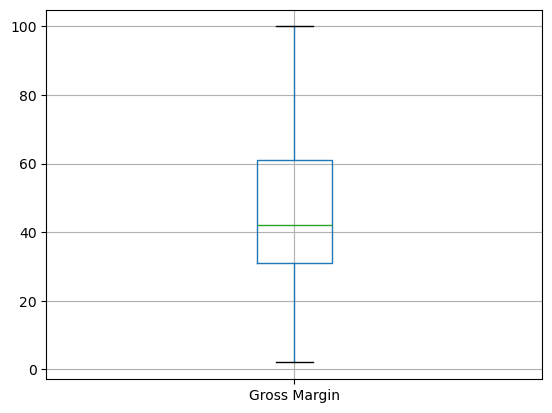

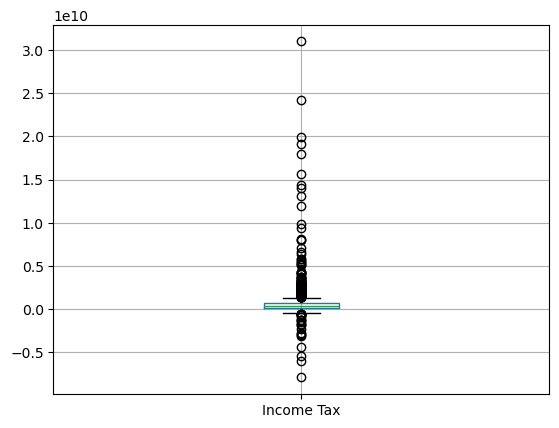

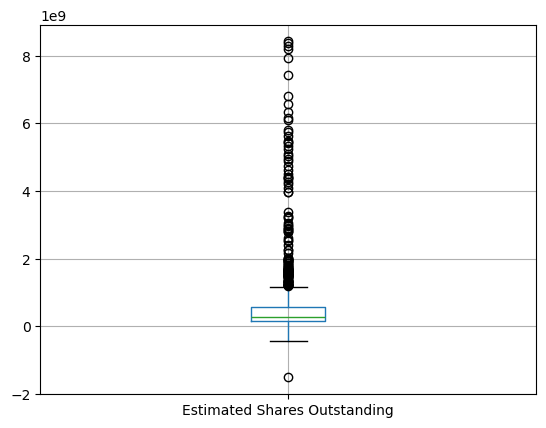

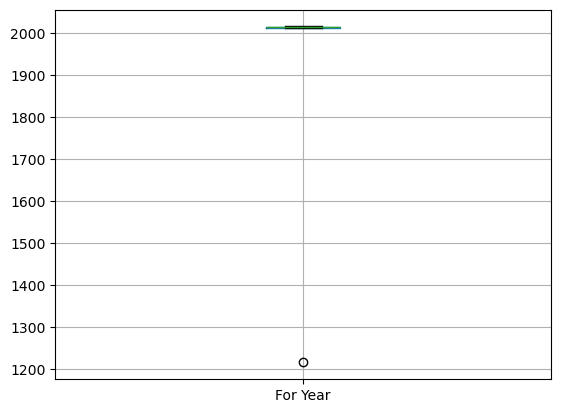

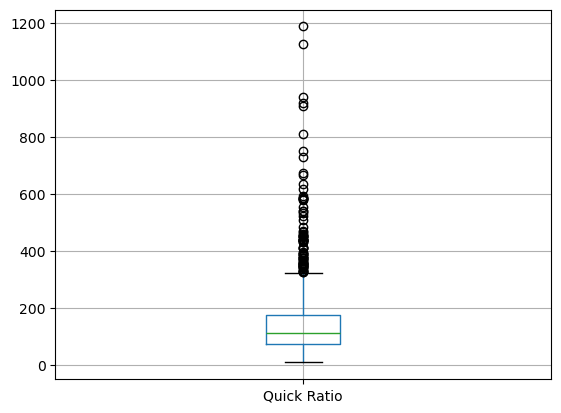

In [10]:
## Box plots

## Initally, all box plots were analyzed, but only 5 were retained
#for i in df.columns:
    #df.boxplot(i)
    #plt.show()

index = ["Gross Margin", "Income Tax", "Estimated Shares Outstanding", "For Year", "Quick Ratio"]

for i in df[index]:
    df.boxplot(i)
    plt.show()


1. Some "Estimated Shares Outstanding" values can be observed to be negative, which ideally cannot be the case 
2. "For Year" has an extreme outlier which can be attributed to data entry error
3. Majority of the attributes have outliers and extreme outliers
4. Some firms have negetive income tax. This could indicate that these firms receive money from the state, maybe as welfare or subsidies

In [11]:
df = df[df["Estimated Shares Outstanding"] >= 0] ## Fixing estimated shares outstanding
df = df[df["For Year"] >= 1900] ## Fixing for year

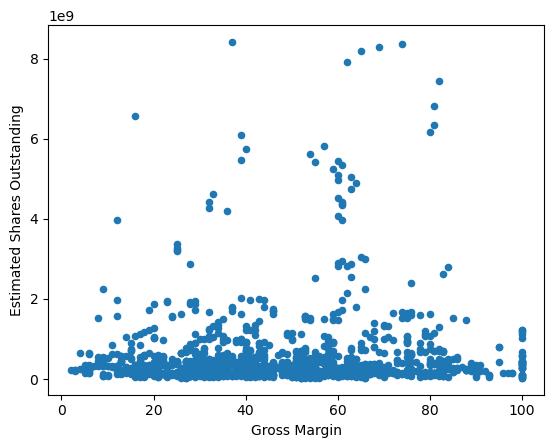

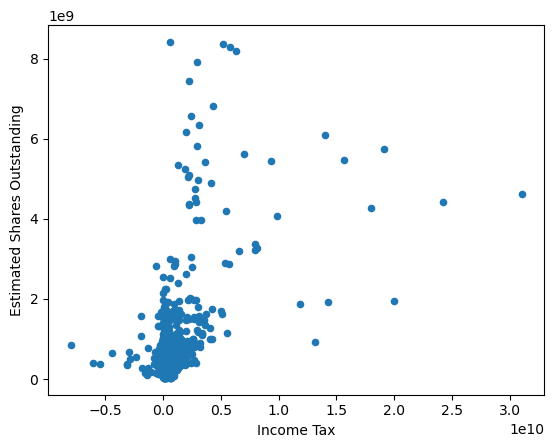

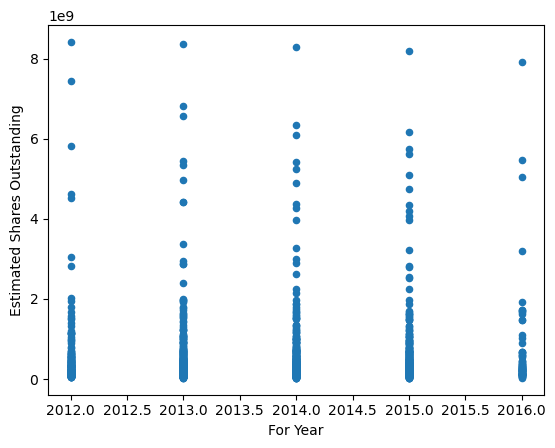

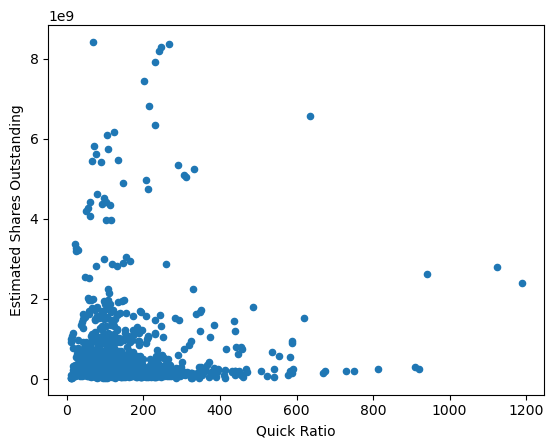

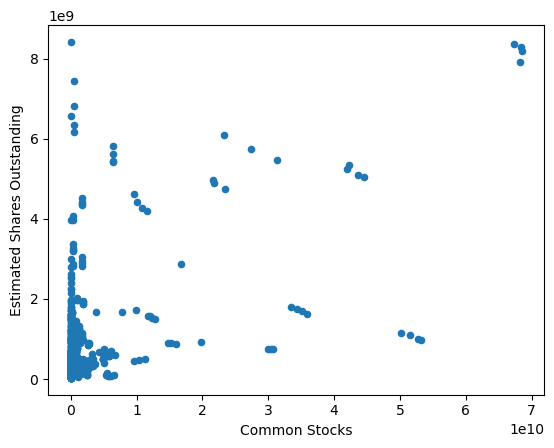

In [12]:
## Scatter plots

#for i in df.columns[:-1]:
    #df.plot.scatter(i, "Estimated Shares Outstanding")
    #plt.show()
    
index = ["Gross Margin", "Income Tax", "For Year", "Quick Ratio", "Common Stocks"]

for i in df[index]:
    df.plot.scatter(i, "Estimated Shares Outstanding")
    plt.show()

- "For Year" column is clearly categorical in nature
- Majority of the variables do not have a linear relationship with respect to "Estimated Shares Outstanding", hence we should expect to see fewer significant variables in our multiple linear regression model
- Multiple variables have simliar distribution with respect to to "Estimated Shares Outstanding", suggesting existience of highly correlation variables, example: "Other current assets", "Other Current Liabilities" or "Other Financing activities", "Other Investing Activities"

##

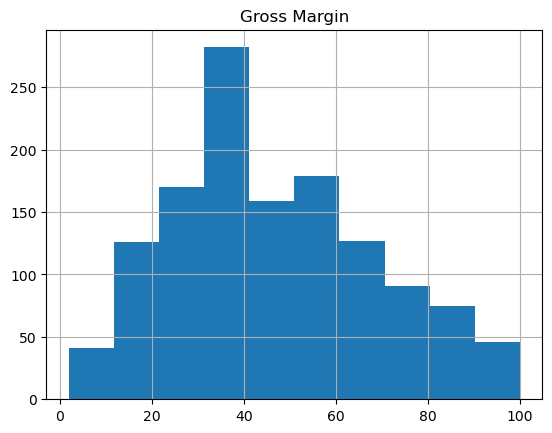

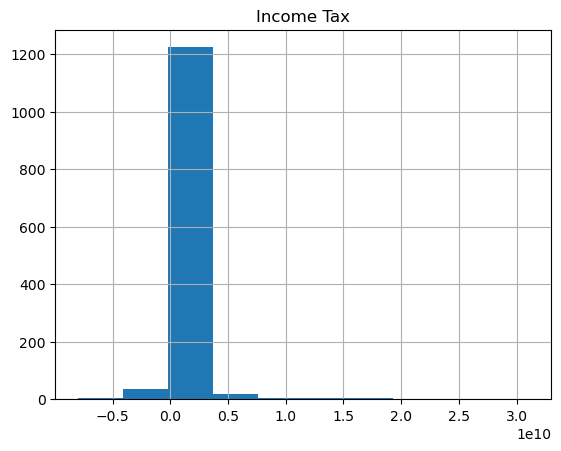

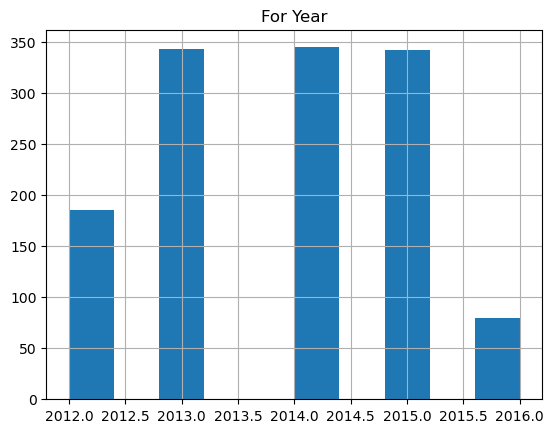

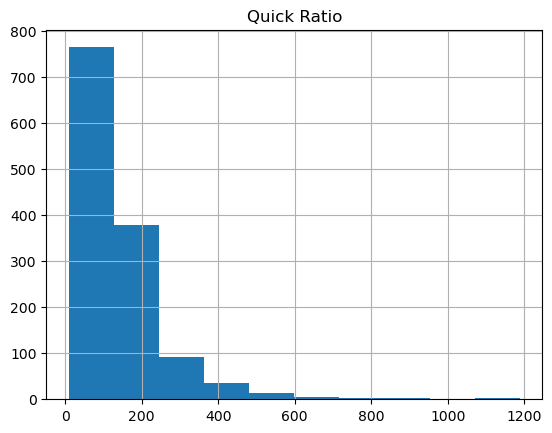

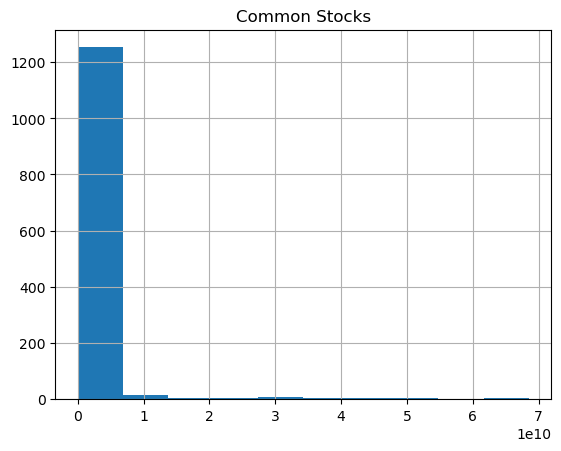

In [13]:
## Histograms
for i in df[index]:
    df.hist(i)
    plt.show()

-  Histogram plots show that majority of the attributes do not follow a normal distribution
-  Majority of the attributes are left skewed
-  In line with the insights from box plot, multiple attributes have outliers and extreme outliers which will affect the linear regression model and hint towards non-linearity

<Axes: >

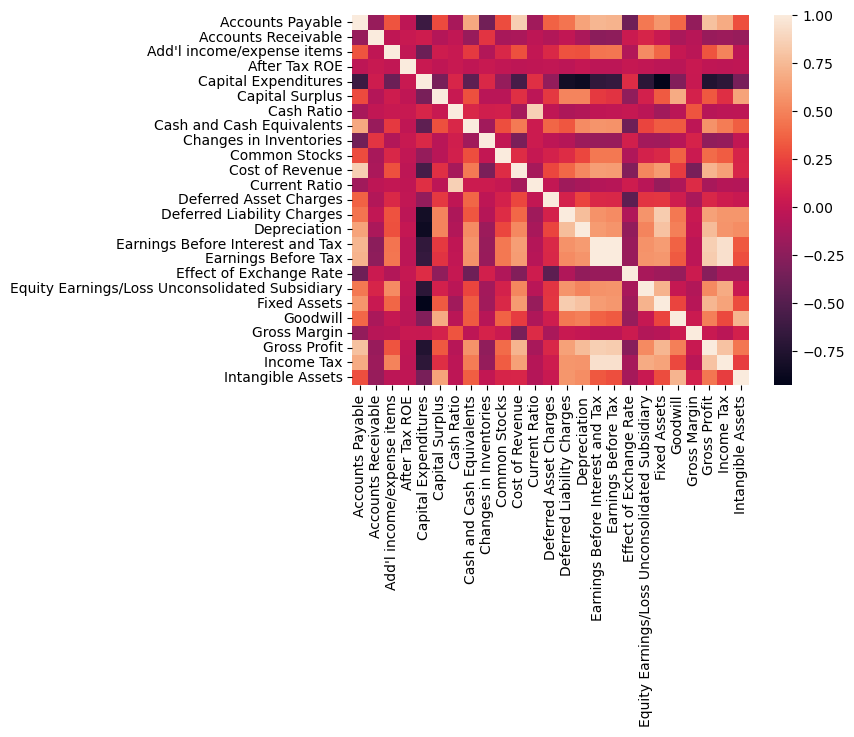

In [14]:
## Correlation heatmaps
cor = df.corr("pearson", numeric_only = True)
sns.heatmap(cor.iloc[:25,:25])

- Current ratio and Cash ratio have a very high +ve correlation
- Income tax and EBIT, and EBT have a very high positive correlation (= 1) which could introduce muticollinearity issues in the model
- This suggests that if all the variables are used, multicollinearity is absolutely bound to be present in the model

<Axes: >

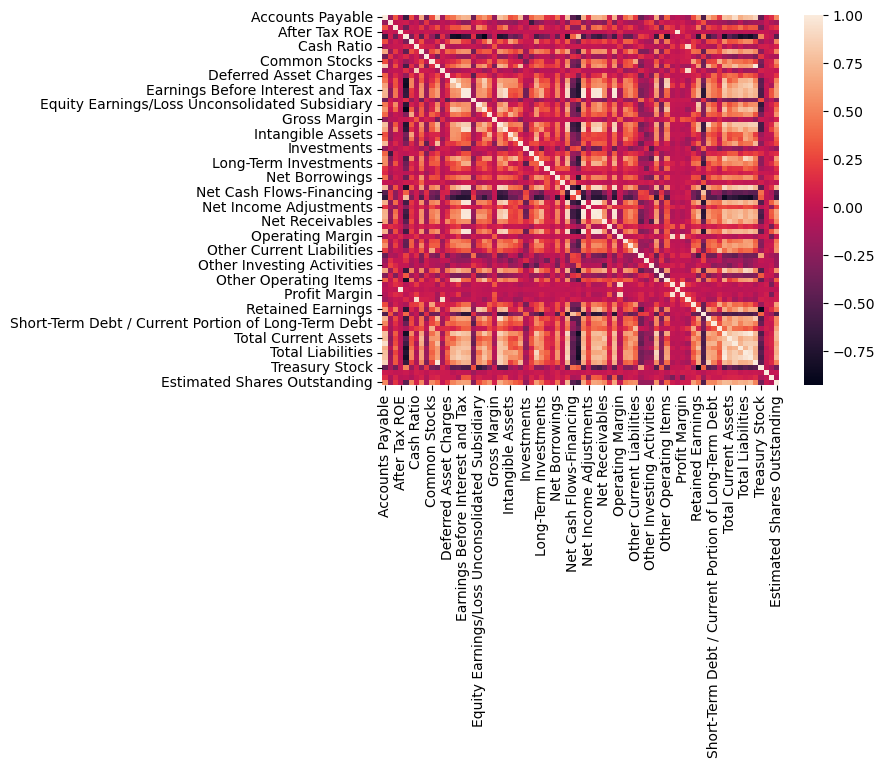

In [15]:
## Extended heatmap
sns.heatmap(cor)

- In line with the reduced version of correlation heatmap, we can see many highly linearly correlated variables, which means that multicollinearity is bound to be present in the linear model if all the variables are used as is

### 2. Linear Regression

In [16]:
import statsmodels.formula.api as smf

In [17]:
## Data prep for regression

columns = df.columns
columns = columns.drop(["For Year", "Estimated Shares Outstanding"])
x = df[columns]
#x_1 = pd.get_dummies(df["For Year"])
#x_1
x_1 = df["For Year"]
#X = pd.concat((x,x_1), axis = 1)
#X = X.drop(columns = 2012.0)
y = df["Estimated Shares Outstanding"]

#x_cat = pd.get_dummies(df["For Year"]).values
#X = np.column_stack((x, x_cat[:,1:]))

In [18]:
## Multiple Linear Regression

model1 = smf.ols(formula = "y ~ x + C(x_1)", data = df).fit()
#p_val.append(model1.pvalues)
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     96.16
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:29:14   Log-Likelihood:                -27430.
No. Observations:                1296   AIC:                         5.501e+04
Df Residuals:                    1219   BIC:                         5.541e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.723e+08   5.51e+07  

In [19]:
# Check available methods

#dir(model1)

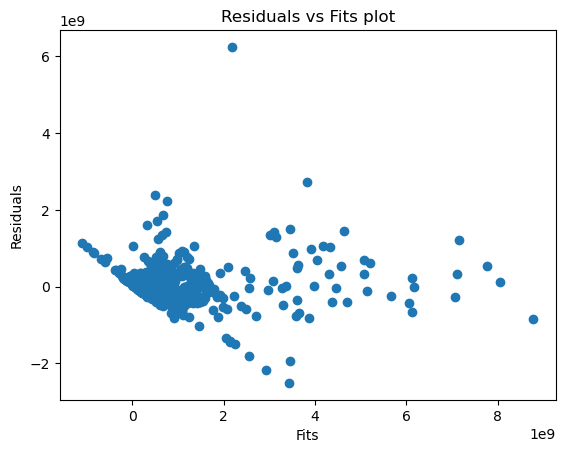

In [20]:
## Fits vs Residuals plot

plt.scatter(x = model1.fittedvalues, y = model1.resid) 
plt.title("Residuals vs Fits plot")
plt.xlabel("Fits")
plt.ylabel("Residuals")
plt.show()
## The points are not equally distributed about 0 and shows patterns

- Fits vs Residuals plots are not evenly distributes across 0 and do nnot appear random
- This might suggest the model is not a good fit

<Axes: >

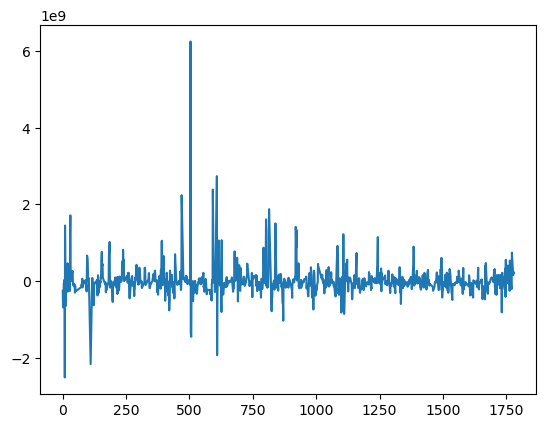

In [21]:
## Residuals plot
model1.resid.plot()

- Residuals plot shows some extreme values

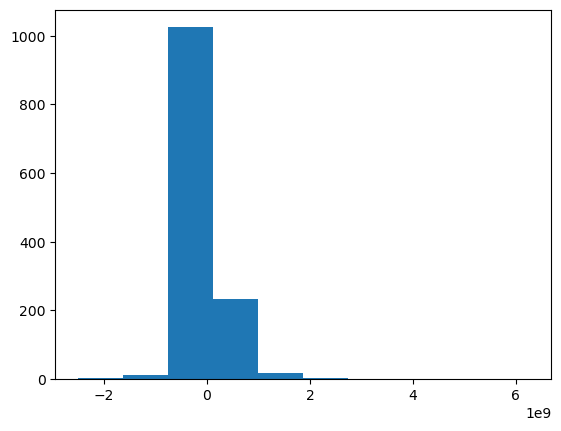

In [22]:
## Residuals distribution plot
plt.hist(model1.resid)
plt.show()

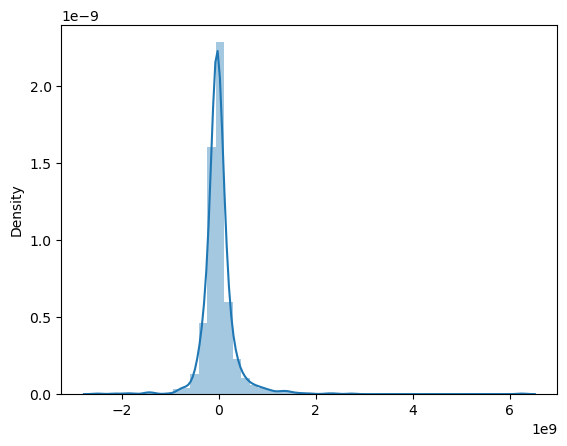

In [23]:
## Residuals distribution plot
sns.distplot(model1.resid)
plt.show()

#### Notes on model:
- R-square = 0.857, which implies 85.7% of the variation in Estimated Shares Outstanding can be explained by the explanatory variables
- p-value of the model suggests that the overall model is valid and the null hypothesis for global F-test can be rejected at 5% confidence
- The model suggests the existance of strong multicollinearity between variables
- The residuals vs fits plot does not have a random scatter and shows some pattern, which indicates the model is missing something
- Continuing the argument from the former point, the plot for residuals is mostly random and the frequency plot indicates outlier values, Skew value suggest a right skew, Kurtosis suggests a leptokurtic distribution of residuals

#### Model coefficient interpretations:
- The Estimated Shares Outstanding = 2.723e+08 when the explanatory variables = 0, which does not make much sense
- The average Estimated Shares Outstanding in 2013, 2014, 2015 and 2016 were not significantly different compared to 2012 as suggested by the p-values

In [24]:
## How many significant attributes?

f"{sum(model1.pvalues <= 0.05)} significant variables at 5% significance"

'21 significant variables at 5% significance'

In [25]:
## Statistically significant variables at 5% significance level

sig_values = [i-1 for i in range(1,len(model1.pvalues)) if model1.pvalues[i] <= 0.05]
x_vars = pd.concat([pd.get_dummies(x_1),x], axis = 1)
x_vars = x_vars.drop(2012.0, axis = 1)
print(pd.Series(x_vars.columns[sig_values]))

0       Cash and Cash Equivalents
1                      Income Tax
2                       Inventory
3                    Misc. Stocks
4                  Net Borrowings
5        Net Cash Flows-Financing
6     Net Income-Cont. Operations
7                 Net Receivables
8             Non-Recurring Items
9                Operating Income
10               Operating Margin
11           Other Current Assets
12     Other Financing Activities
13                 Pre-Tax Margin
14       Research and Development
15     Sale and Purchase of Stock
16                   Total Equity
17              Total Liabilities
18     Total Liabilities & Equity
19             Earnings Per Share
dtype: object


### 3. Notes on multicolinearity and its effect on the model

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
p_val = pd.DataFrame(model1.pvalues, columns = ["P-values"])
p_val = p_val[1:]

In [28]:
vif_data = pd.DataFrame() 
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))]

print(str(len(vif_data[vif_data["VIF"] >= 10])) + " variables have a VIF >= 10 indicating a problematic level of multicollinearity in the model")
#plt.scatter(y = vif_data["VIF"], x = p_val["P-values"])


64 variables have a VIF >= 10 indicating a problematic level of multicollinearity in the model


- Multicollinearity affects the regression model parameters in 2 ways:
    1. It results in biased estimates of the parameters in case of perfect multicollinearity
    2. Parameter estimates remain unbaised, but the variance is inflated and the confidence interval estimates are unreliable in presence of imperfect multicollinearity
   
   This implies that it would be hard to interpret the model. i.e it would be difficult to tell the change in "y" for one unit increase in x.
   
  When independent variables are highly correlated, change in one variable would cause change in another and so the model results will fluctuate significantly. 
  
  The model results will be unstable and vary a lot given a small change in the data or model. 

### 4. Histogram of p-values

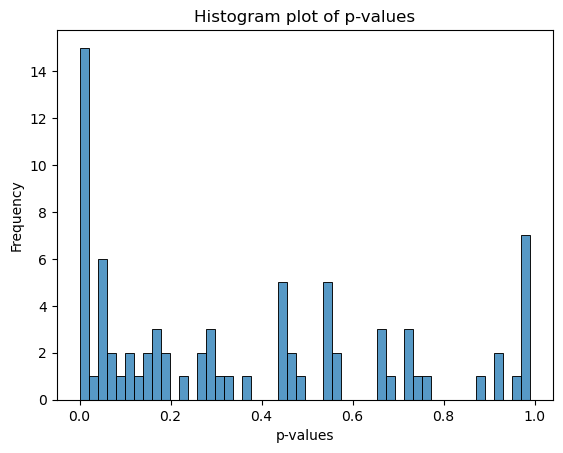

In [29]:
sns.histplot(model1.pvalues, bins = 50)
plt.title("Histogram plot of p-values")
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.show()

- The p-value histogram can be observed to be slightly left skewed
- As observed from the regression output, about 20 variables or statistically significant at 5%
- These p-values cannot be used as is because the model has servere multicollinearity issues
- But, since there is a high frequency of p-values close to 0, we can say that we have truly statistically significant variables. But we cannot be absoulutely sure about the number of truly significant variables due to the large number of coefficients being tested and can expect false positives to be present

### 5. FDR control with BH procedure

In [30]:
## FDR procedure function

def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

Alpha: 0.014360406896265379


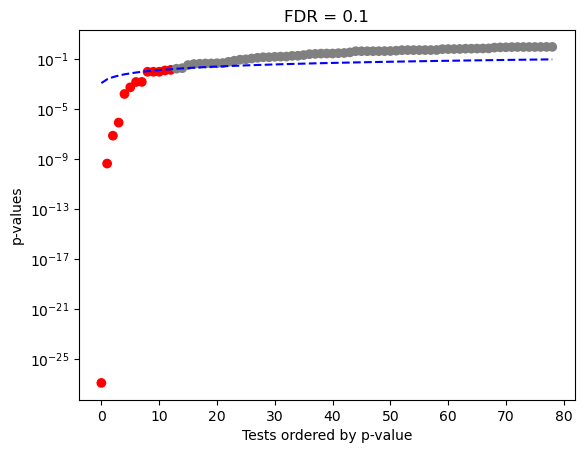

In [31]:
alpha_threshold = fdr(model1.pvalues, 0.1, plotit=True)
plt.show()

In [32]:
sig_values = [i-1 for i in range(1,len(model1.pvalues)) if model1.pvalues[i] <= alpha_threshold]
x_vars = pd.concat([pd.get_dummies(x_1),x], axis = 1)
x_vars = x_vars.drop(2012.0, axis = 1)
print(pd.Series(x_vars.columns[sig_values]))

0                     Income Tax
1                   Misc. Stocks
2                 Net Borrowings
3               Operating Income
4               Operating Margin
5                 Pre-Tax Margin
6       Research and Development
7     Sale and Purchase of Stock
8                   Total Equity
9              Total Liabilities
10    Total Liabilities & Equity
11            Earnings Per Share
dtype: object


#### Comments on BH procedure

- Using the BH procedure, the number of truly significant coefficients can be observed to be 12 which is a 40% reduction in significant variables discovered without the BH procedure

### 6. Sensitivity analysis of FDR control

Alpha: 0.014360406896265379


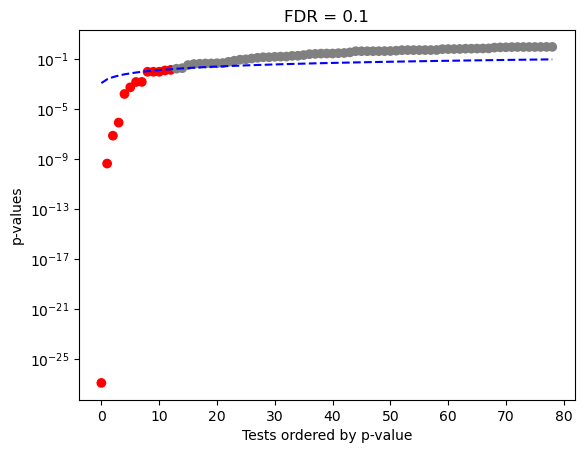

Alpha: 0.019792937686027263


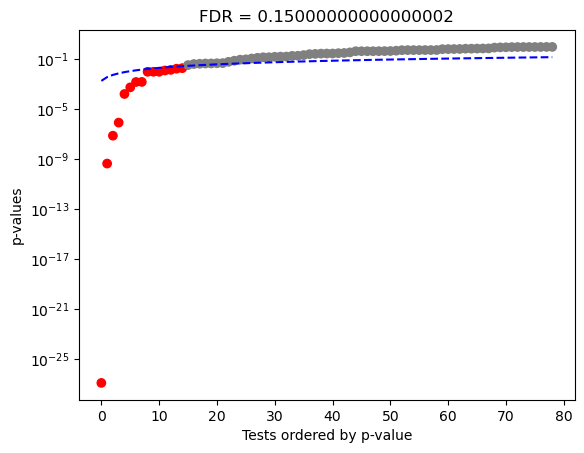

Alpha: 0.05041995966965967


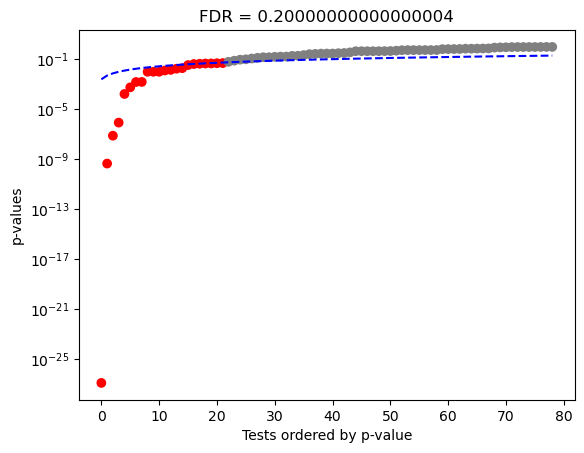

Alpha: 0.06353871985654722


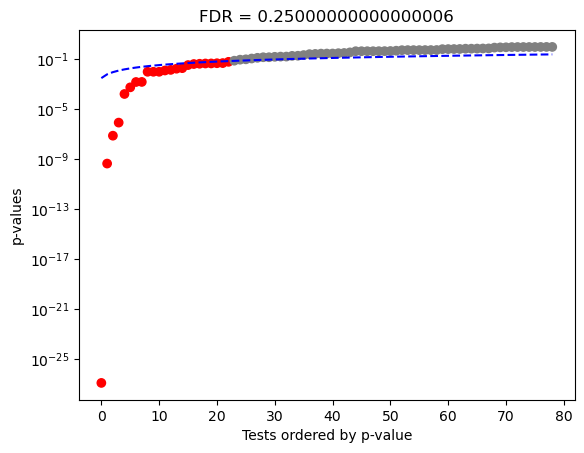

Alpha: 0.09449546563028352


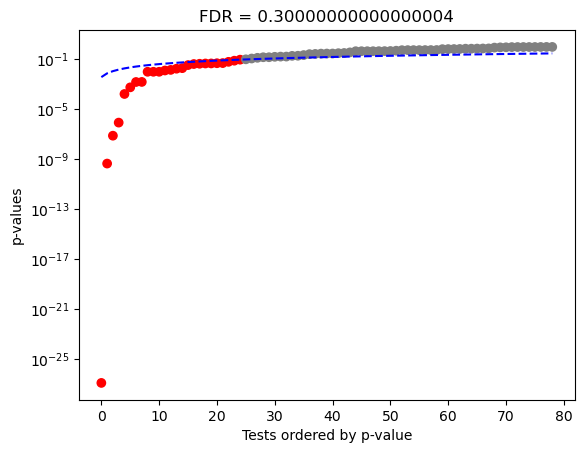

In [33]:
q_val = np.arange(0.1,0.35,0.05)
alpha_threshold = []
for i in q_val:
    alpha_threshold.append(fdr(model1.pvalues, i, plotit=True))
#plt.plot(q_val, alpha_threshold)

### Notes on FRD sensitivity analysis

- It can be observed that the number of significant variables increases/ shoot up drastically as the q-value increases. This implies that the p-values (significance of the variables) are sentive to the q value and hence not robust, which implies that the model may be incomplete


### 7. Exploring Interaction Terms

In [34]:
from itertools import product
from sklearn.preprocessing import PolynomialFeatures

In [35]:
## Multiple Linear Regression with interaction and Quadratic terms

y = df["Estimated Shares Outstanding"]
#x_cat = pd.get_dummies(df["For Year"]).values
#X = np.column_stack((x, x_cat[:,1:]))

X = x.iloc[:,:25]


interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_inter = interaction.fit_transform(X)
X_inter_const = sm.add_constant(X_inter)

In [36]:
model2 = smf.ols(formula = "y ~ X_inter", data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     55.29
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:29:17   Log-Likelihood:                -26790.
No. Observations:                1296   AIC:                         5.421e+04
Df Residuals:                     980   BIC:                         5.584e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0002      0.000      1.068   

From a financial metrics standpoint it makes sense to include the interaction terms because, "Estimated Shares Outstanding" may depend on the interplay of mutliple variables like the affect of exchange rate on Gross profit. 
This could help understand how exposed the firm's gross profits is to exchange rate which in turn affects the estimated shares outstanding. Exchange rate by itself may not affect a firm that operates domestically compared to a firm operating internationally.
This cannot be captured by a simple linear model and hence a model with interaction would be better suited to 
   

### 8. Model Evaluation with Interaction terms

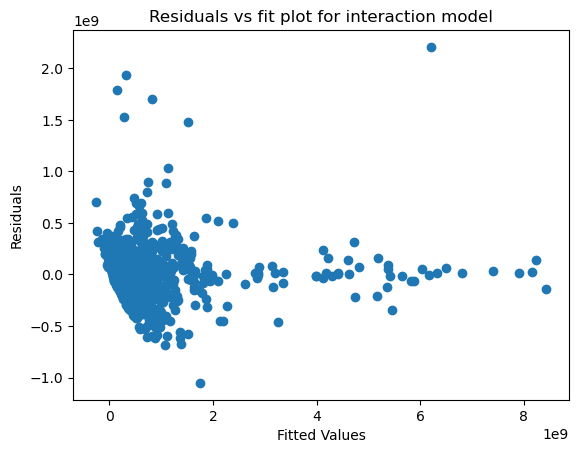

In [37]:
plt.scatter(x = model2.fittedvalues, y = model2.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs fit plot for interaction model")
plt.show()

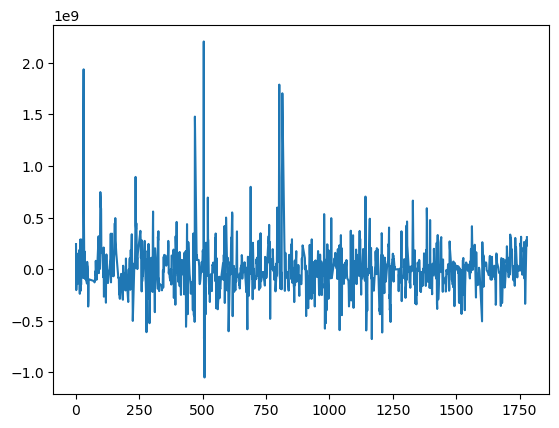

In [38]:
## Residuals plot
model2.resid.plot()
plt.show()

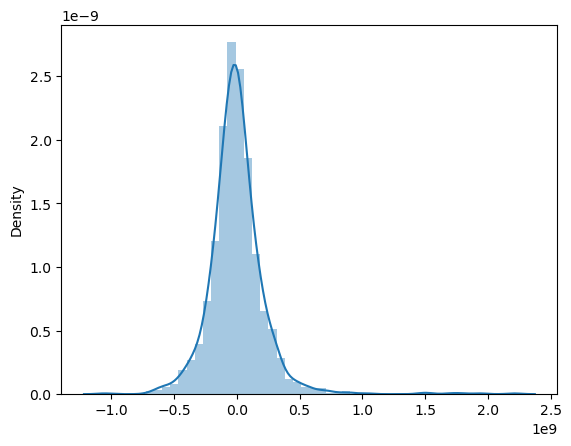

In [39]:
## Residuals distribution plot
sns.distplot(model2.resid)
plt.show()

In [40]:
## % improvement in SSE in reduced (linear) vs full (polynomial) model = SSE(r) - SSE(F) / SSE(R)
(model1.mse_resid * 1219 - model2.mse_resid * 980)/(model1.mse_resid * 1219)

0.6273391362712688

#### Notes on model:
- One immediate observation is that the intercept value changes drastically, and the intercept does not have a statistically significant affect on the "Estimated Shares Outstanding"
- R-square = 0.947, which implies 94.7% of the variation in Estimated Shares Outstanding can be explained by the explanatory variables
- The full model (i.e polynomial) explains 62.73 % of variation in "Estimated Shares Outstanding" which is not explained by the reduced (linear) model, hence making the polynomial model a better fit for our data
- p-value of the model (=0.00) suggests that the overall model is valid and the null hypothesis for global F-test can be rejected at 5% confidence
- The model suggests the existance of strong multicollinearity in the model.
- The residuals vs fits plot does not have a random scatter and shows some pattern, which indicates the model is missing something
- But, the residuals plot shows improvements, as it is much more randomly distributed.
- Similarly, the residuals histogram plot shows improvement and is much closer to a normal distribution compared to the reduced model (linear). 

### 9. FDR Analysis with Interaction Terms

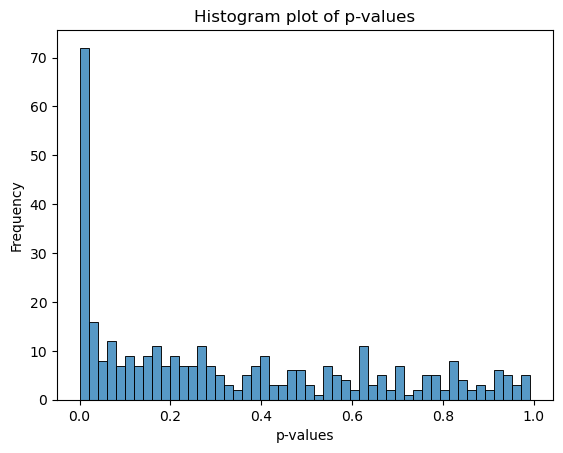

In [41]:
sns.histplot(model2.pvalues, bins =50)
plt.title("Histogram plot of p-values")
plt.xlabel("p-values")
plt.ylabel("Frequency")
plt.show()

In [42]:
sig_var = np.where(model2.pvalues <= 0.05)
f"{len(sig_var[0])} significant variables without FDR control"

'93 significant variables without FDR control'

- The histogram for p-values has a sharp up-tick close to zero, indicating the presence of variables whose effect on "Estimated Shares Outstanding" is statistically significant.
- While it does indicate the presence of a high number of significant variables (93) @ 5% significance, we cannot be absolutely sure due to the high likelihood of false positives when we have 350 explanatory variables

Alpha: 0.020239225933544807


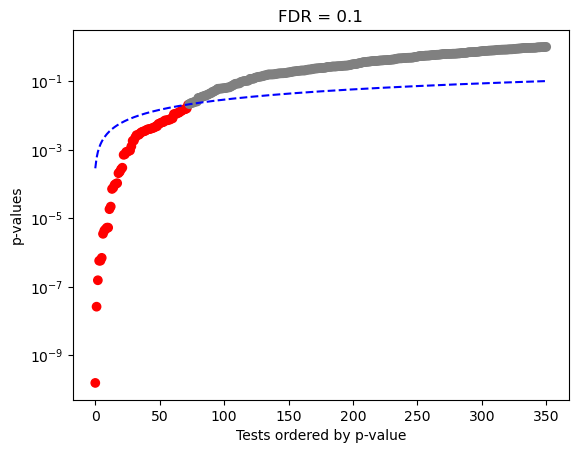

In [43]:
alpha_threshold = fdr(model2.pvalues, 0.1, plotit=True)
plt.show()

In [44]:
sig_var = np.where(model2.pvalues <= 0.01963535666438986)
f"{len(sig_var[0])} significant variables with FDR control"

'72 significant variables with FDR control'

Alpha: 0.020239225933544807


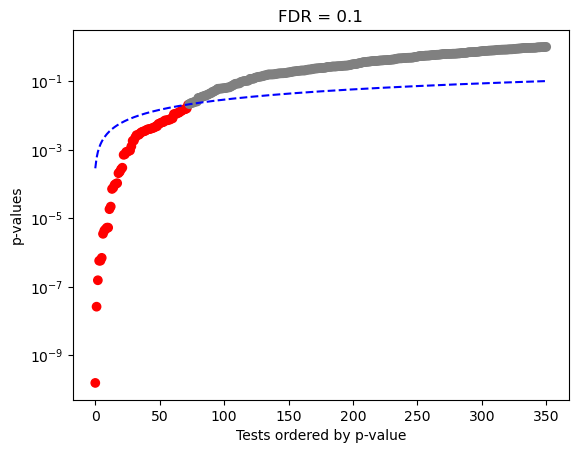

Alpha: 0.0358073703689684


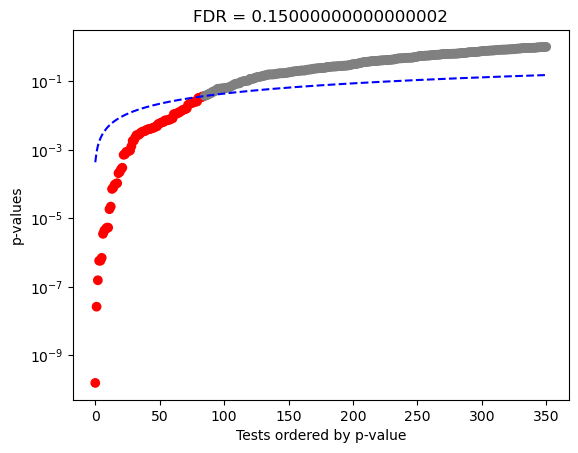

Alpha: 0.054084116026715055


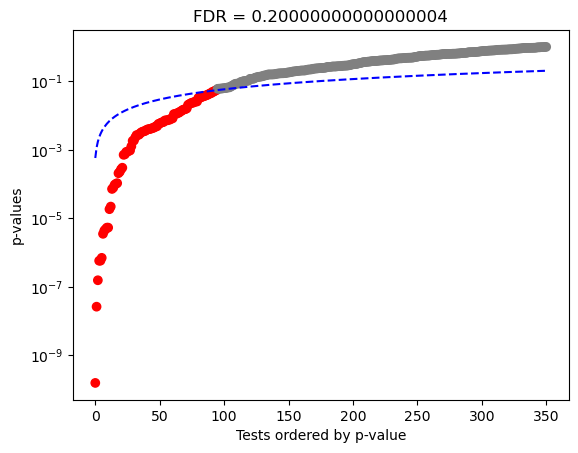

Alpha: 0.07480260189788746


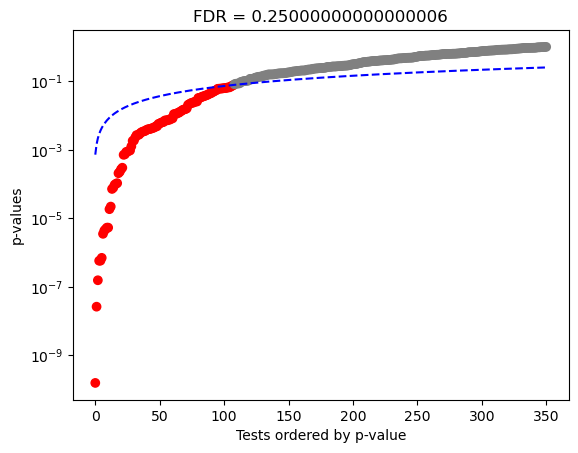

Alpha: 0.09580798541911152


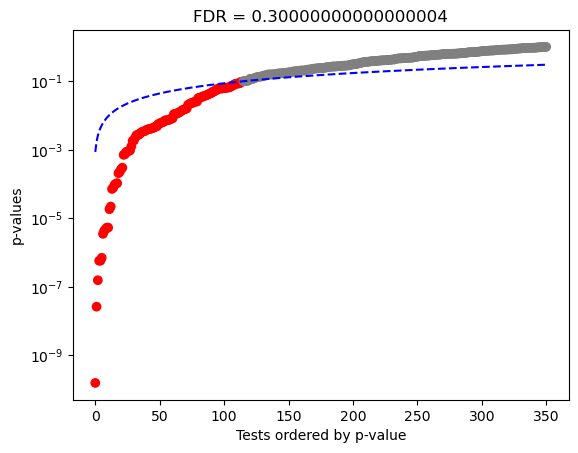

In [45]:
q_val = np.arange(0.1,0.35,0.05)
alpha_threshold1 = []
for i in q_val:
    alpha_threshold1.append(fdr(model2.pvalues, i, plotit=True))

- It can be observed that the number of signifcant variables does not significantly shoot up with an increase in q (the allowable FDP).
- This implies that the polynomial model variables are not sensitive to q and hence are robust i.e the model does a good job in explaining the model compared to the linear model